<a href="https://colab.research.google.com/github/ClaFlorez/choisir-algoritme-ML/blob/main/preparer_vous_donnees_pour_entrainement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Exploration et nettoyage des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

print("🔍 EXPLORATION ET NETTOYAGE DES DONNÉES")
print("=" * 40)

# Créer un dataset réaliste avec des problèmes typiques
np.random.seed(42)
n_samples = 1000

# Générer des données avec des problèmes volontaires
data = {
    'age': np.random.randint(18, 80, n_samples),
    'salaire': np.random.normal(50000, 20000, n_samples),
    'experience': np.random.randint(0, 40, n_samples),
    'ville': np.random.choice(['Paris', 'Lyon', 'Marseille', 'Toulouse', 'Nice'], n_samples),
    'diplome': np.random.choice(['BAC', 'BAC+2', 'BAC+3', 'BAC+5', 'Doctorat'], n_samples),
    'satisfaction': np.random.randint(1, 6, n_samples)
}

df = pd.DataFrame(data)
df


🔍 EXPLORATION ET NETTOYAGE DES DONNÉES


,age,salaire,experience,ville,diplome,satisfaction
0,56,77447.555931,39,Toulouse,BAC,3
1,69,36444.278140,20,Nice,Doctorat,2
2,46,73070.637440,27,Marseille,BAC+5,3
3,32,42499.787433,10,Lyon,Doctorat,5
4,60,36117.080930,33,Toulouse,BAC+2,4
...,...,...,...,...,...,...
995,18,70523.085628,27,Paris,BAC+3,5
996,35,55828.998464,23,Paris,BAC+3,5
997,49,35386.360724,14,Marseille,BAC+5,5
998,64,46043.906282,21,Marseille,BAC+2,1


In [12]:
# Introduire des problèmes volontaires
# 1. Valeurs manquantes
missing_indices = np.random.choice(n_samples, 50, replace=False)
df.loc[missing_indices, 'salaire'] = np.nan

missing_indices_2 = np.random.choice(n_samples, 30, replace=False)
df.loc[missing_indices_2, 'diplome'] = np.nan

# 2. Outliers extrêmes
outlier_indices = np.random.choice(n_samples, 20, replace=False)
df.loc[outlier_indices, 'salaire'] = np.random.uniform(200000, 500000, 20)

# 3. Valeurs incohérentes
df.loc[df['experience'] > df['age'] - 16, 'experience'] = df['age'] - 18

# 4. Doublons
duplicate_indices = np.random.choice(n_samples, 10, replace=False)
for idx in duplicate_indices:
    df.loc[len(df)] = df.loc[idx]

print(f"📊 Dataset initial : {df.shape}")



📊 Dataset initial : (1010, 6)


In [13]:
# 1. EXPLORATION INITIALE
print(f"\n🔍 1. EXPLORATION INITIALE")
print(f"Forme du dataset : {df.shape}")
print(f"Types de données :")
print(df.dtypes)

print(f"\nPremières lignes :")
print(df.head())

print(f"\nStatistiques descriptives :")
print(df.describe())

# 2. DÉTECTION DES PROBLÈMES
print(f"\n🚨 2. DÉTECTION DES PROBLÈMES")

# Valeurs manquantes
print(f"Valeurs manquantes :")
missing_info = df.isnull().sum()
missing_percent = (missing_info / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_info.index,
    'Manquantes': missing_info.values,
    'Pourcentage': missing_percent.values
})
print(missing_df[missing_df['Manquantes'] > 0])

# Doublons
duplicates = df.duplicated().sum()
print(f"\nDoublons détectés : {duplicates}")

# Outliers (méthode IQR)
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nOutliers détectés :")
for col in numeric_cols:
    if col in df.columns:
        outliers = detect_outliers_iqr(df[col].dropna())
        print(f"  {col}: {outliers.sum()} outliers ({outliers.mean()*100:.1f}%)")




🔍 1. EXPLORATION INITIALE
Forme du dataset : (1010, 6)
Types de données :
age               int64
salaire         float64
experience        int64
ville            object
diplome          object
satisfaction      int64
dtype: object

Premières lignes :
   age       salaire  experience      ville   diplome  satisfaction
0   56  77447.555931          39   Toulouse       BAC             3
1   69  36444.278140          20       Nice  Doctorat             2
2   46  73070.637440          27  Marseille     BAC+5             3
3   32  42499.787433          10       Lyon  Doctorat             5
4   60  36117.080930          33   Toulouse     BAC+2             4

Statistiques descriptives :
               age        salaire   experience  satisfaction
count  1010.000000     963.000000  1010.000000   1010.000000
mean     49.815842   57049.487297    15.857426      2.953465
std      18.139088   49055.941941    10.981084      1.413096
min      18.000000  -19563.384273     0.000000      1.000000
25%  

In [ ]:
# 3. NETTOYAGE
print(f"\n🧹 3. NETTOYAGE")

# Supprimer les doublons
df_clean = df.drop_duplicates()
print(f"Après suppression doublons : {df_clean.shape}")

# Gestion des valeurs manquantes
print(f"\nGestion des valeurs manquantes :")

# Pour les variables numériques : imputation par la médiane
numeric_imputer = SimpleImputer(strategy='median')
df_clean['salaire'] = numeric_imputer.fit_transform(df_clean[['salaire']]).ravel()

# Pour les variables catégorielles : imputation par le mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_clean['diplome'] = categorical_imputer.fit_transform(df_clean[['diplome']]).ravel()

print(f"Valeurs manquantes après imputation :")
print(df_clean.isnull().sum())

# Gestion des outliers (cap à 3 écarts-types)
def cap_outliers(series, n_std=3):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std
    return series.clip(lower_bound, upper_bound)

df_clean['salaire'] = cap_outliers(df_clean['salaire'])

print(f"\nDataset après nettoyage : {df_clean.shape}")
print(f"✅ Nettoyage terminé !")

# Visualisation avant/après
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution des salaires avant/après
axes[0, 0].hist(df['salaire'].dropna(), bins=50, alpha=0.7, color='red', label='Avant')
axes[0, 0].set_title('Distribution Salaires - Avant nettoyage')
axes[0, 0].set_xlabel('Salaire')
axes[0, 0].set_ylabel('Fréquence')

axes[0, 1].hist(df_clean['salaire'], bins=50, alpha=0.7, color='green', label='Après')
axes[0, 1].set_title('Distribution Salaires - Après nettoyage')
axes[0, 1].set_xlabel('Salaire')
axes[0, 1].set_ylabel('Fréquence')

# Box plots
axes[1, 0].boxplot(df['salaire'].dropna())
axes[1, 0].set_title('Box Plot - Avant nettoyage')
axes[1, 0].set_ylabel('Salaire')

axes[1, 1].boxplot(df_clean['salaire'])
axes[1, 1].set_title('Box Plot - Après nettoyage')
axes[1, 1].set_ylabel('Salaire')

plt.tight_layout()
plt.show()

print(f"📊 Visualisations créées pour comparer avant/après nettoyage")
#Encodage des variables catégorielles
# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

print("🏷️ ENCODAGE DES VARIABLES CATÉGORIELLES")
print("=" * 40)

# Utiliser le dataset nettoyé précédent
# df_clean est disponible

# Identifier les variables catégorielles
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Variables catégorielles détectées : {categorical_cols}")

# Analyser chaque variable catégorielle
for col in categorical_cols:
    print(f"\n📊 Variable '{col}' :")
    value_counts = df_clean[col].value_counts()
    print(f"  Valeurs uniques : {df_clean[col].nunique()}")
    print(f"  Distribution :")
    for value, count in value_counts.items():
        percentage = (count / len(df_clean)) * 100
        print(f"    {value}: {count} ({percentage:.1f}%)")

# 1. LABEL ENCODING (pour variables ordinales)
print(f"\n🔢 1. LABEL ENCODING")

# Le diplôme a un ordre naturel : BAC < BAC+2 < BAC+3 < BAC+5 < Doctorat
diplome_mapping = {
    'BAC': 0,
    'BAC+2': 1,
    'BAC+3': 2,
    'BAC+5': 3,
    'Doctorat': 4
}

df_encoded = df_clean.copy()
df_encoded['diplome_encoded'] = df_encoded['diplome'].map(diplome_mapping)

print(f"Mapping diplôme :")
for original, encoded in diplome_mapping.items():
    print(f"  {original} → {encoded}")

# Vérification
print(f"\nVérification encodage diplôme :")
comparison = df_encoded[['diplome', 'diplome_encoded']].drop_duplicates().sort_values('diplome_encoded')
print(comparison)



📊 Visualisations créées pour comparer avant/après nettoyage
🏷️ ENCODAGE DES VARIABLES CATÉGORIELLES
Variables catégorielles détectées : ['ville', 'diplome']

📊 Variable 'ville' :
  Valeurs uniques : 5
  Distribution :
    Paris: 220 (22.0%)
    Marseille: 204 (20.4%)
    Nice: 196 (19.6%)
    Lyon: 192 (19.2%)
    Toulouse: 189 (18.9%)

📊 Variable 'diplome' :
  Valeurs uniques : 5
  Distribution :
    BAC+5: 262 (26.2%)
    Doctorat: 201 (20.1%)
    BAC+3: 189 (18.9%)
    BAC+2: 183 (18.3%)
    BAC: 166 (16.6%)

🔢 1. LABEL ENCODING
Mapping diplôme :
  BAC → 0
  BAC+2 → 1
  BAC+3 → 2
  BAC+5 → 3
  Doctorat → 4

Vérification encodage diplôme :
    diplome  diplome_encoded
0       BAC                0
4     BAC+2                1
6     BAC+3                2
2     BAC+5                3
1  Doctorat                4


In [7]:
# 2. ONE-HOT ENCODING (pour variables nominales)
print(f"\n🎯 2. ONE-HOT ENCODING")

# La ville n'a pas d'ordre naturel → One-Hot Encoding
ville_encoded = pd.get_dummies(df_encoded['ville'], prefix='ville')
print(f"Colonnes créées pour 'ville' :")
print(ville_encoded.columns.tolist())

# Ajouter au dataframe
df_encoded = pd.concat([df_encoded, ville_encoded], axis=1)

print(f"\nAperçu du one-hot encoding :")
sample_data = df_encoded[['ville'] + ville_encoded.columns.tolist()].head()
print(sample_data)




🎯 2. ONE-HOT ENCODING
Colonnes créées pour 'ville' :
['ville_Lyon', 'ville_Marseille', 'ville_Nice', 'ville_Paris', 'ville_Toulouse']

Aperçu du one-hot encoding :
       ville  ville_Lyon  ville_Marseille  ville_Nice  ville_Paris  \
0   Toulouse       False            False       False        False   
1       Nice       False            False        True        False   
2  Marseille       False             True       False        False   
3       Lyon        True            False       False        False   
4   Toulouse       False            False       False        False   

   ville_Toulouse  
0            True  
1           False  
2           False  
3           False  
4            True  



📊 3. COMPARAISON DES MÉTHODES
            Méthode  Variables créées                Usage  \
0    Label Encoding                 1  Variables ordinales   
1  One-Hot Encoding                 5  Variables nominales   

                 Avantages          Inconvénients  
0  Compact, préserve ordre  Crée ordre artificiel  
1   Pas d'ordre artificiel    Augmente dimensions  

🎪 4. VARIABLES HAUTE CARDINALITÉ
Code postal - valeurs uniques : 20

Après regroupement des catégories rares :
Code postal original : 20 catégories
Code postal groupé : 20 catégories

ℹ️ Target Encoding : Remplace catégories par moyenne de la target
   → Sera vu dans les techniques avancées

✅ 5. VALIDATION DE L'ENCODAGE
Types de données après encodage :
✅ diplome_encoded : int64
✅ ville_Lyon : bool
✅ ville_Marseille : bool
✅ ville_Nice : bool
✅ ville_Paris : bool
✅ ville_Toulouse : bool
⚠️  code_postal_grouped : object (à encoder)

Dimensions finales :
  Avant encodage : (1001, 6)
  Après encodage : (1001, 14)
  Nouv

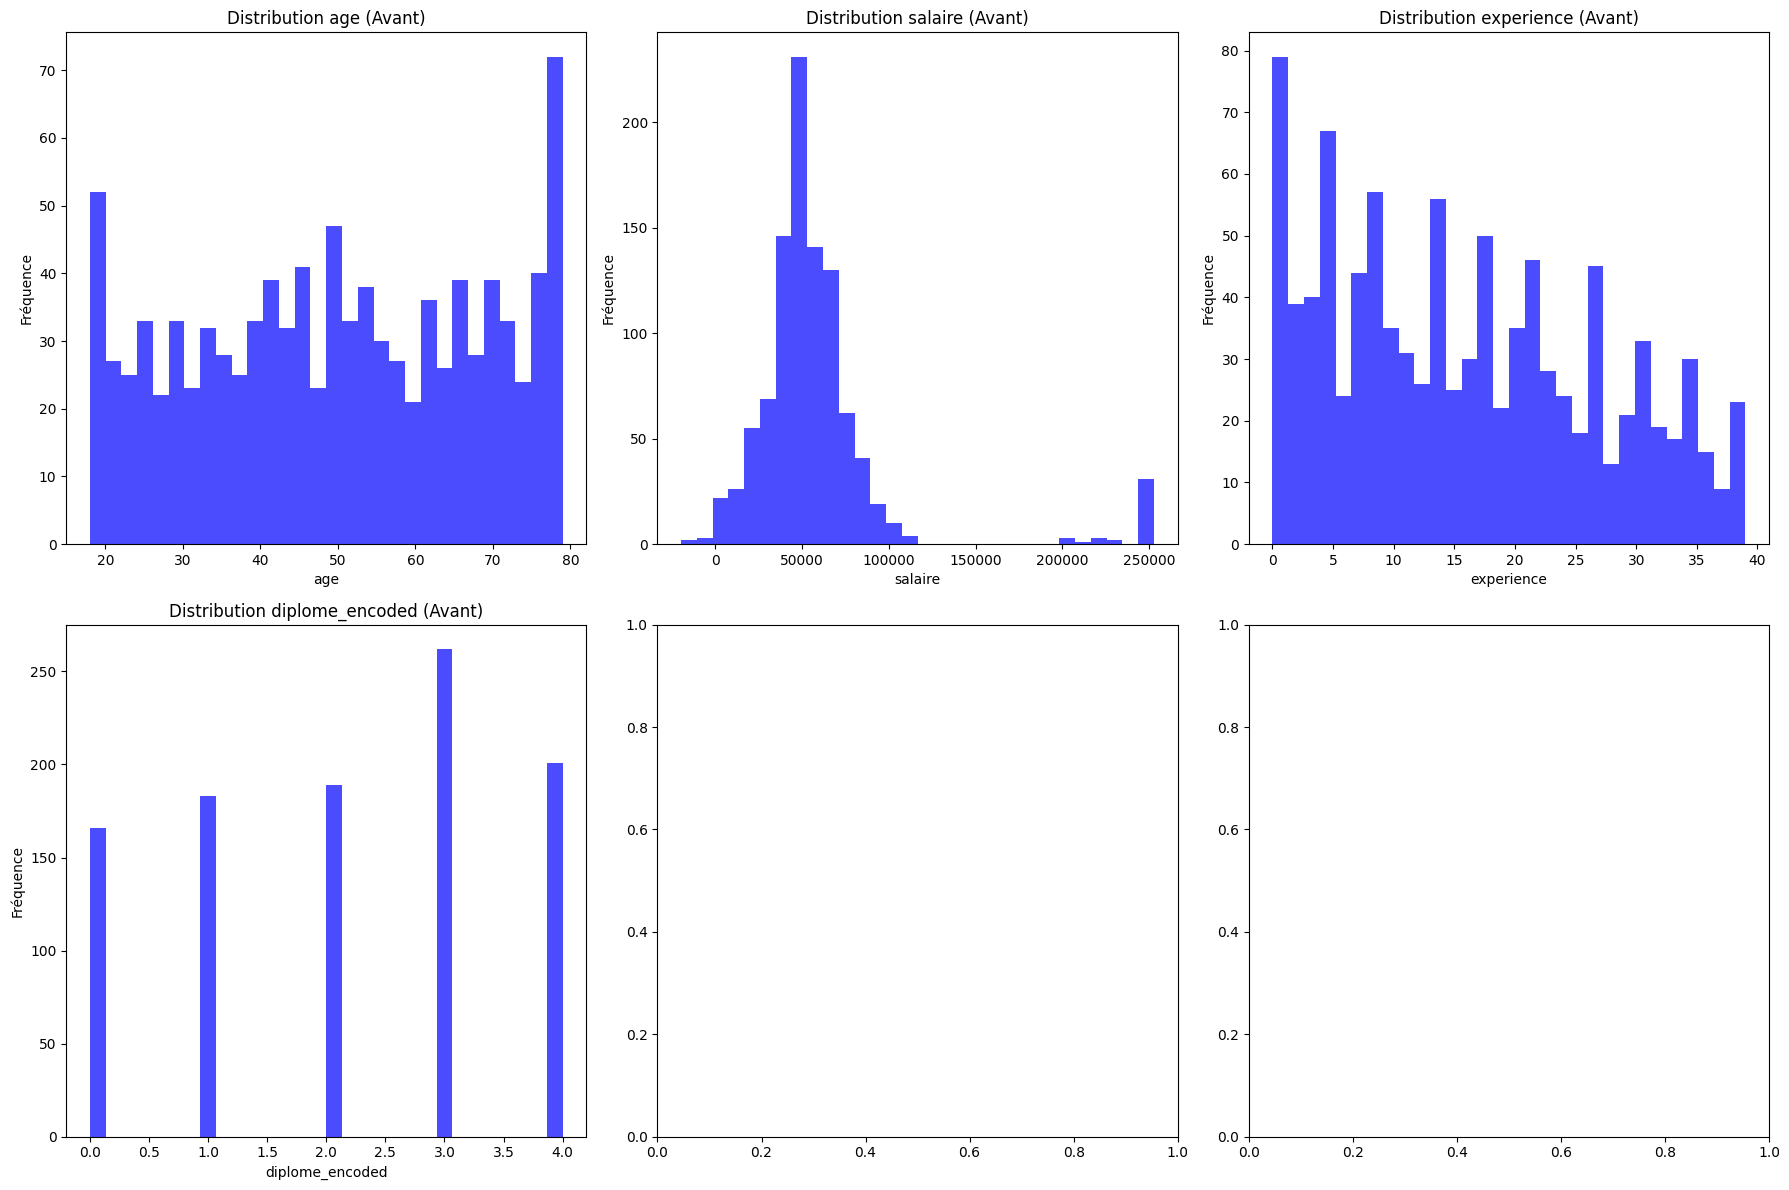


📏 1. STANDARDISATION (Z-SCORE)
Formule : (x - moyenne) / écart-type
Résultat : moyenne = 0, écart-type = 1

Après standardisation :
            age   salaire  experience  diplome_encoded
count  1001.000  1001.000    1001.000         1001.000
mean      0.000     0.000      -0.000            0.000
std       1.000     1.000       1.000            1.000
min      -1.758    -1.824      -1.447           -1.564
25%      -0.819    -0.454      -0.808           -0.836
50%       0.009    -0.143      -0.078           -0.108
75%       0.893     0.161       0.744            0.619
max       1.611     4.510       2.113            1.347

📐 2. NORMALISATION MIN-MAX
Formule : (x - min) / (max - min)
Résultat : valeurs entre 0 et 1

Après normalisation Min-Max :
            age   salaire  experience  diplome_encoded
count  1001.000  1001.000    1001.000         1001.000
mean      0.522     0.288       0.406            0.537
std       0.297     0.158       0.281            0.344
min       0.000     0.000  

In [8]:
# 3. COMPARAISON DES MÉTHODES
print(f"\n📊 3. COMPARAISON DES MÉTHODES")

comparison_data = {
    'Méthode': ['Label Encoding', 'One-Hot Encoding'],
    'Variables créées': [1, ville_encoded.shape[1]],
    'Usage': ['Variables ordinales', 'Variables nominales'],
    'Avantages': ['Compact, préserve ordre', 'Pas d\'ordre artificiel'],
    'Inconvénients': ['Crée ordre artificiel', 'Augmente dimensions']
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# 4. GESTION DES VARIABLES HAUTE CARDINALITÉ
print(f"\n🎪 4. VARIABLES HAUTE CARDINALITÉ")

# Simuler une variable avec beaucoup de catégories
np.random.seed(42)
df_encoded['code_postal'] = np.random.choice([f'750{i:02d}' for i in range(1, 21)], len(df_encoded))

print(f"Code postal - valeurs uniques : {df_encoded['code_postal'].nunique()}")

# Techniques pour variables haute cardinalité :

# A. Regroupement par fréquence
def group_rare_categories(series, threshold=0.05):
    """Regroupe les catégories rares sous 'Autres'"""
    value_counts = series.value_counts()
    total = len(series)

    # Catégories représentant moins de threshold% des données
    rare_categories = value_counts[value_counts / total < threshold].index

    # Remplacer par 'Autres'
    series_grouped = series.copy()
    series_grouped[series_grouped.isin(rare_categories)] = 'Autres'

    return series_grouped

# Appliquer le regroupement
df_encoded['code_postal_grouped'] = group_rare_categories(df_encoded['code_postal'], threshold=0.03)

print(f"\nAprès regroupement des catégories rares :")
print(f"Code postal original : {df_encoded['code_postal'].nunique()} catégories")
print(f"Code postal groupé : {df_encoded['code_postal_grouped'].nunique()} catégories")

# B. Target Encoding (pour plus tard)
print(f"\nℹ️ Target Encoding : Remplace catégories par moyenne de la target")
print(f"   → Sera vu dans les techniques avancées")

# 5. VALIDATION DE L'ENCODAGE
print(f"\n✅ 5. VALIDATION DE L'ENCODAGE")

# Vérifier qu'il n'y a plus de variables object (sauf celles qu'on garde)
print(f"Types de données après encodage :")
types_after = df_encoded.dtypes
for col, dtype in types_after.items():
    if dtype == 'object' and col not in ['ville', 'diplome', 'code_postal']:
        print(f"⚠️  {col} : {dtype} (à encoder)")
    elif col.endswith('_encoded') or col.startswith('ville_'):
        print(f"✅ {col} : {dtype}")

# Dimensions finales
print(f"\nDimensions finales :")
print(f"  Avant encodage : {df_clean.shape}")
print(f"  Après encodage : {df_encoded.shape}")
print(f"  Nouvelles colonnes : {df_encoded.shape[1] - df_clean.shape[1]}")

# 6. PRÉPARER LES FEATURES FINALES
print(f"\n🎯 6. FEATURES FINALES POUR LE ML")

# Sélectionner les colonnes pour le ML (seulement numériques)
feature_cols = ['age', 'salaire', 'experience', 'diplome_encoded'] + ville_encoded.columns.tolist()
target_col = 'satisfaction'

X = df_encoded[feature_cols]
y = df_encoded[target_col]

print(f"Features sélectionnées ({len(feature_cols)}) :")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\nTarget : {target_col}")
print(f"Dataset ML final : X{X.shape}, y{y.shape}")

# Vérifier qu'il n'y a plus de valeurs manquantes
print(f"\nVérification finale :")
print(f"  Valeurs manquantes dans X : {X.isnull().sum().sum()}")
print(f"  Valeurs manquantes dans y : {y.isnull().sum()}")
print(f"  Types de données dans X :")
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"    ⚠️  {col} : {X[col].dtype}")

print(f"\n🎉 Encodage terminé ! Données prêtes pour le ML.")

# Normalisation et standardisation des données
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("⚖️ NORMALISATION ET STANDARDISATION")
print("=" * 35)

# Utiliser les features préparées précédemment
# X et y sont disponibles

print(f"📊 Données avant normalisation :")
print(X.describe())

# Visualisation des distributions avant normalisation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Sélectionner quelques colonnes numériques pour visualisation
numeric_features = ['age', 'salaire', 'experience', 'diplome_encoded']

for i, col in enumerate(numeric_features):
    if i < len(axes):
        axes[i].hist(X[col], bins=30, alpha=0.7, color='blue')
        axes[i].set_title(f'Distribution {col} (Avant)')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# 1. STANDARDISATION (Z-SCORE)
print(f"\n📏 1. STANDARDISATION (Z-SCORE)")
print(f"Formule : (x - moyenne) / écart-type")
print(f"Résultat : moyenne = 0, écart-type = 1")

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns)

print(f"\nAprès standardisation :")
stats_standard = X_standard[numeric_features].describe()
print(stats_standard.round(3))

# 2. NORMALISATION MIN-MAX
print(f"\n📐 2. NORMALISATION MIN-MAX")
print(f"Formule : (x - min) / (max - min)")
print(f"Résultat : valeurs entre 0 et 1")

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

print(f"\nAprès normalisation Min-Max :")
stats_minmax = X_minmax[numeric_features].describe()
print(stats_minmax.round(3))

# 3. NORMALISATION ROBUSTE
print(f"\n🛡️ 3. NORMALISATION ROBUSTE")
print(f"Formule : (x - médiane) / (Q3 - Q1)")
print(f"Résultat : Résistant aux outliers")

scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns=X.columns)

print(f"\nAprès normalisation Robuste :")
stats_robust = X_robust[numeric_features].describe()
print(stats_robust.round(3))




📊 4. COMPARAISON VISUELLE


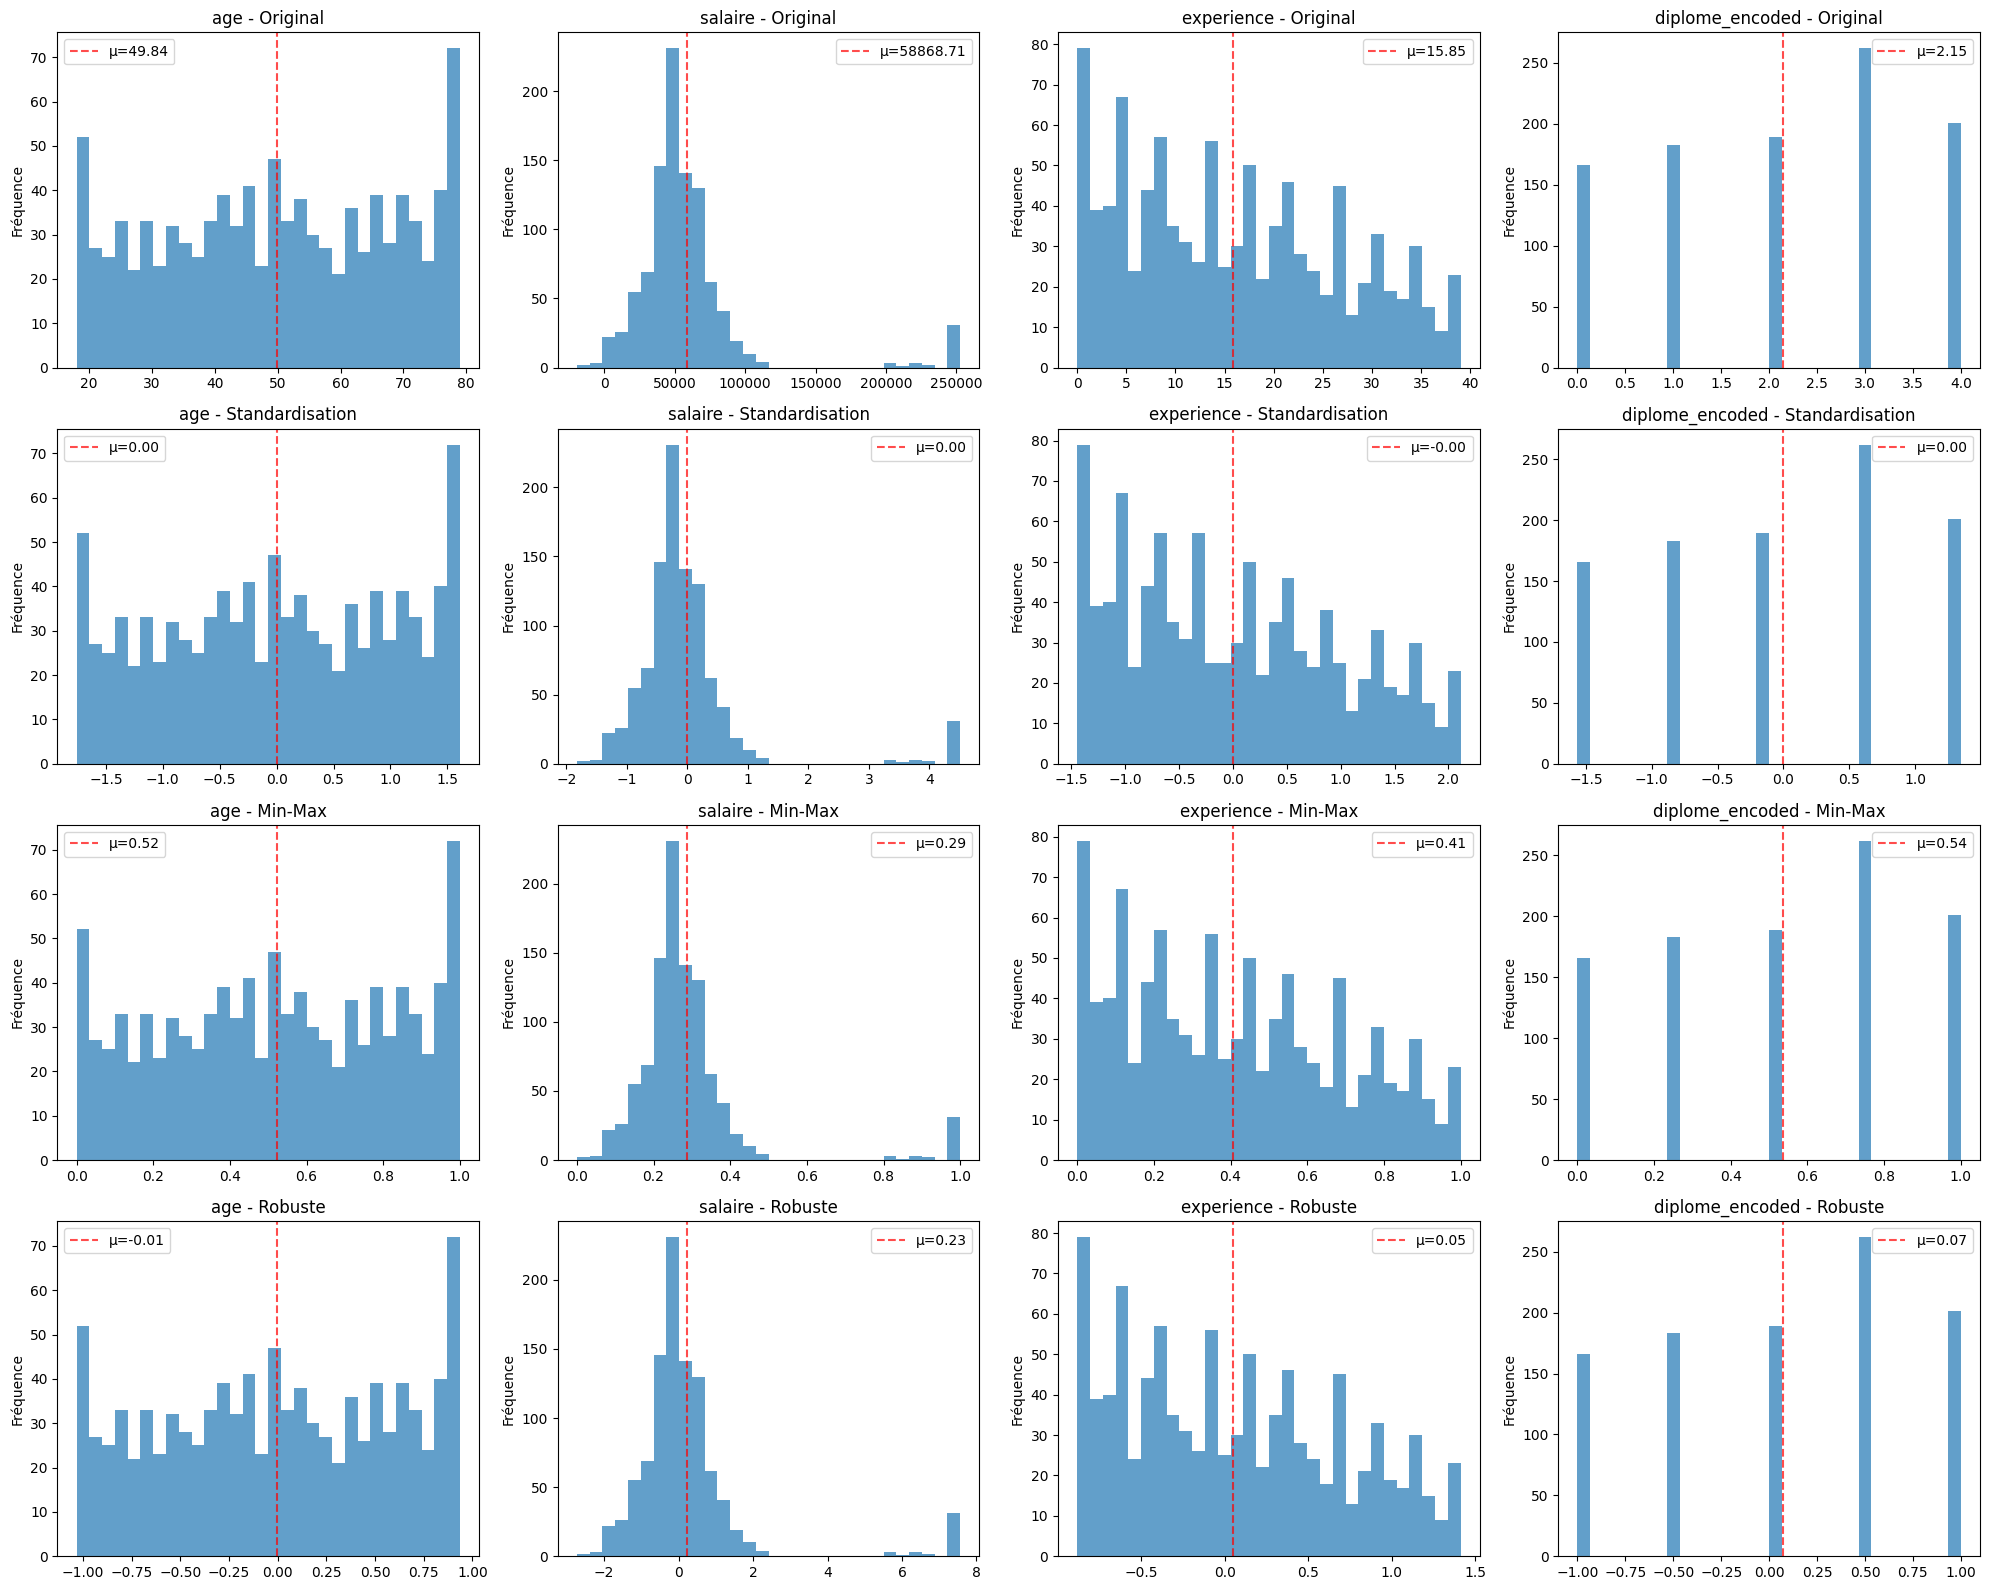

In [9]:
# 4. COMPARAISON VISUELLE
print(f"\n📊 4. COMPARAISON VISUELLE")

fig, axes = plt.subplots(4, 4, figsize=(20, 16))

# Données originales et 3 normalisations
datasets = [
    (X, 'Original'),
    (X_standard, 'Standardisation'),
    (X_minmax, 'Min-Max'),
    (X_robust, 'Robuste')
]

for row, (data, title) in enumerate(datasets):
    for col, feature in enumerate(numeric_features):
        axes[row, col].hist(data[feature], bins=30, alpha=0.7)
        axes[row, col].set_title(f'{feature} - {title}')
        axes[row, col].set_ylabel('Fréquence')

        # Ajouter statistiques sur le graphique
        mean_val = data[feature].mean()
        std_val = data[feature].std()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'μ={mean_val:.2f}')
        axes[row, col].legend()

plt.tight_layout()
plt.show()




🎯 5. GUIDE DE SÉLECTION
          Méthode            Formule      Résultat  \
0  StandardScaler            (x-μ)/σ      μ=0, σ=1   
1    MinMaxScaler  (x-min)/(max-min)  Min=0, Max=1   
2    RobustScaler    (x-médiane)/IQR     Médiane≈0   

                          Quand utiliser                       Algorithmes  
0   Distribution normale, pas d'outliers  SVM, Régression, Neural Networks  
1  Bornes connues, distribution uniforme              Neural Networks, KNN  
2                    Présence d'outliers                    Tous (robuste)  

🚨 6. IMPACT DES OUTLIERS
Données avec outliers extrêmes :
Salaire max original : 252,773
Salaire max avec outliers : 1,263,867


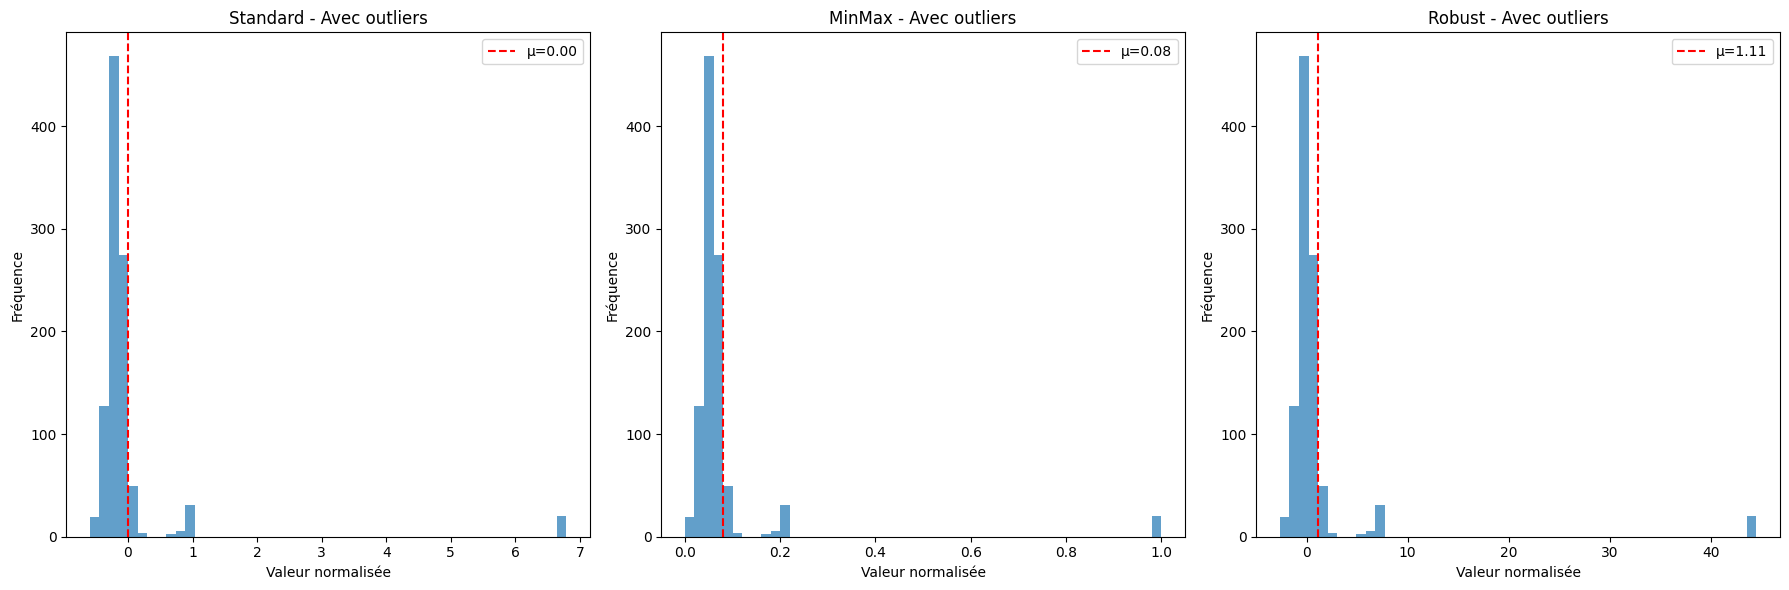

👀 Observation : RobustScaler est moins affecté par les outliers

✅ 7. BONNES PRATIQUES
  🎯 Toujours fit() sur train, transform() sur train ET test
  🔄 Sauvegarder le scaler pour les nouvelles données
  📊 Visualiser avant/après normalisation
  🧪 Tester plusieurs méthodes et comparer
  ⚠️ Attention aux fuites de données (data leakage)
  🎨 Variables catégorielles encodées n'ont souvent pas besoin de normalisation

🔬 8. EXEMPLE COMPLET TRAIN/TEST
Données divisées : Train(800, 9), Test(201, 9)
✅ Normalisation correcte effectuée

Statistiques Train (doit être ≈ μ=0, σ=1) :
           age  salaire  experience  diplome_encoded
count  800.000  800.000     800.000          800.000
mean    -0.000   -0.000      -0.000            0.000
std      1.001    1.001       1.001            1.001
min     -1.766   -1.725      -1.445           -1.605
25%     -0.828   -0.451      -0.811           -0.867
50%      0.000   -0.168      -0.086           -0.129
75%      0.883    0.123       0.820            0.609
ma

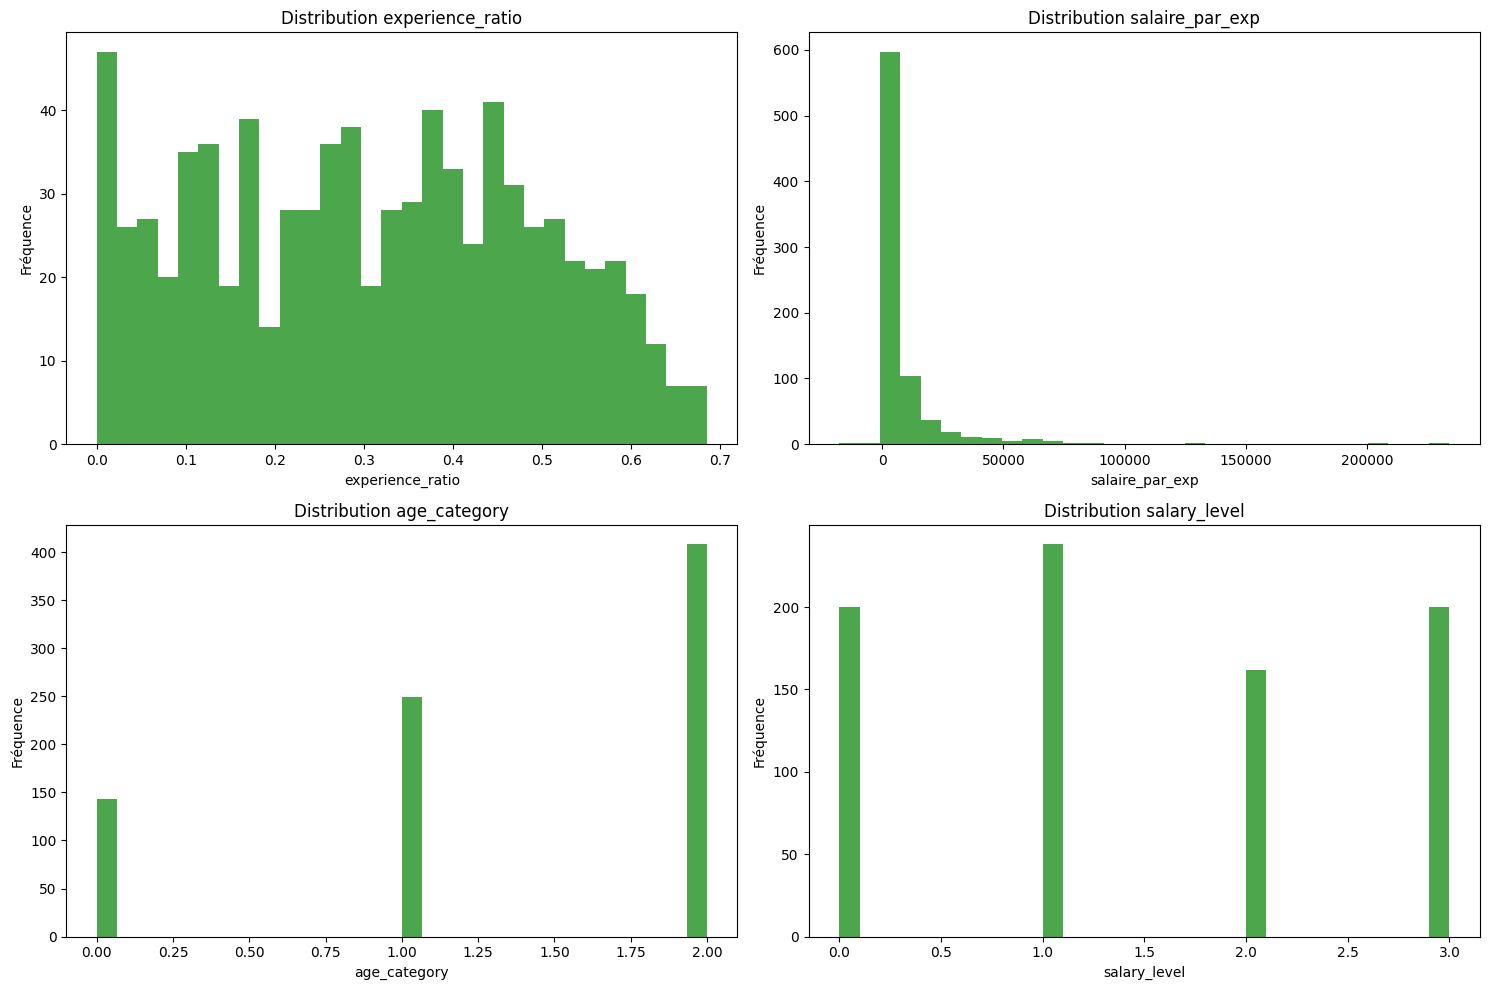


📈 2. FEATURES POLYNOMIALES
Features polynomiales créées : 9
Exemples de nouvelles features :
   1. age
   2. salaire
   3. experience
   4. age^2
   5. age salaire
   6. age experience
   7. salaire^2
   8. salaire experience
   9. experience^2
Dataset avec features polynomiales : 19 features

🤝 3. INTERACTIONS PERSONNALISÉES
Feature d'interaction diplôme×ville créée
Valeurs uniques : 25

🎯 4. SÉLECTION DES FEATURES
Avant sélection : 20 features
Features sélectionnées par F-score (15) :
   1. diplome_encoded           (score: 1.93)
   2. ville_Lyon                (score: 1.66)
   3. ville_Marseille           (score: 0.70)
   4. ville_Paris               (score: 1.68)
   5. ville_Toulouse            (score: 0.59)
   6. experience_ratio          (score: 0.76)
   7. salaire_par_exp           (score: 1.39)
   8. age_category              (score: 0.64)
   9. age                       (score: 0.41)
  10. experience                (score: 1.57)
  11. age experience            (score: 1.86)
 

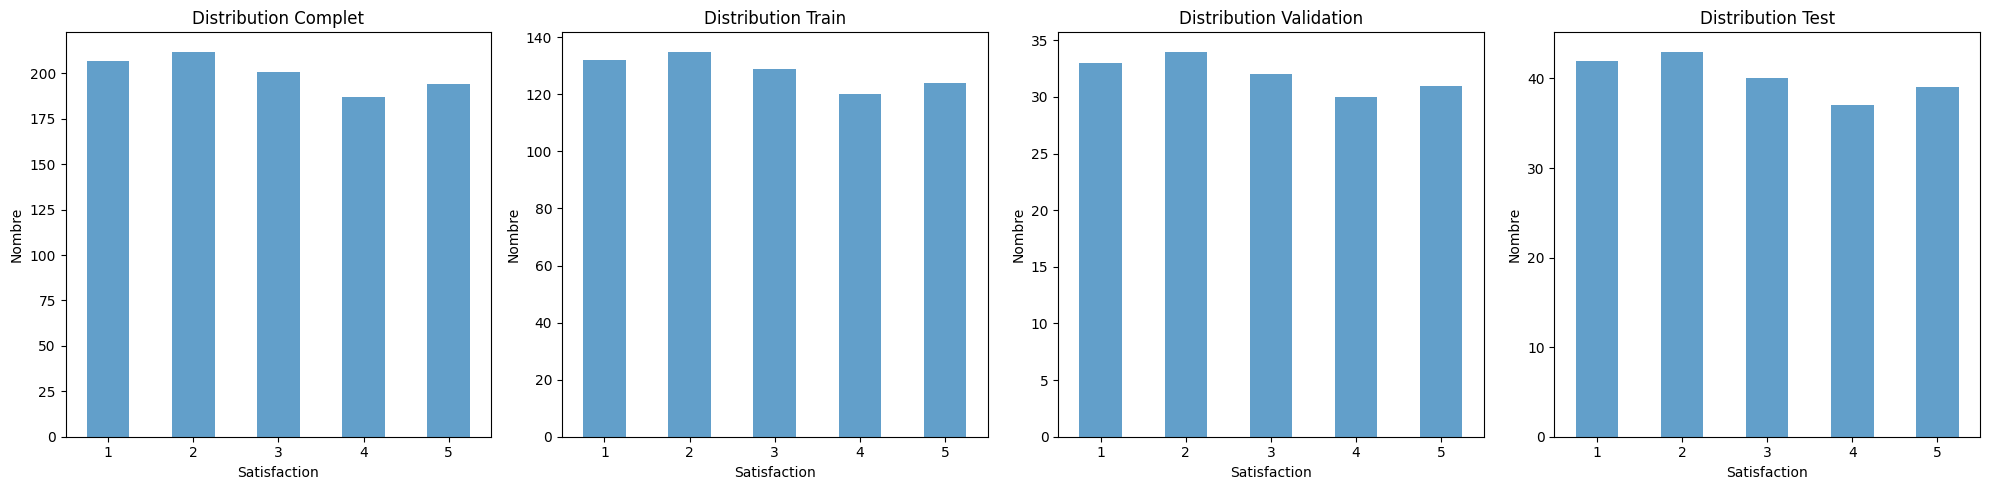


🔍 4. VÉRIFICATION DES FEATURES
Moyennes des features principales :
                    Train  Validation     Test
age                 49.39       50.58    50.66
experience          15.79       15.54    16.30
diplome_encoded      2.20        2.07     2.04
experience_ratio     0.31        0.29     0.31
salaire_par_exp   7911.42     9568.02  8057.49

Écarts entre Train et Test (doivent être petits) :
  ✅ age                  : 1.265
  ✅ experience           : 0.506
  ✅ diplome_encoded      : 0.157
  ✅ experience_ratio     : 0.002
  ✅ salaire_par_exp      : 146.077

🎯 5. STRATIFICATION AVANCÉE
Clés de stratification créées : 25 combinaisons uniques
Distribution des clés (top 10) :
1_3    58
3_3    55
4_3    54
2_3    48
1_1    47
5_3    47
3_4    46
2_0    44
4_4    42
2_1    42
Name: count, dtype: int64

🔄 6. VALIDATION CROISÉE (APERÇU)

💡 VALIDATION CROISÉE :
   • Alternative à la division fixe train/val
   • Divise les données en K plis (folds)
   • Entraîne K fois, chaque fois avec un

In [10]:
# 5. QUAND UTILISER QUELLE MÉTHODE ?
print(f"\n🎯 5. GUIDE DE SÉLECTION")

guide_data = {
    'Méthode': ['StandardScaler', 'MinMaxScaler', 'RobustScaler'],
    'Formule': ['(x-μ)/σ', '(x-min)/(max-min)', '(x-médiane)/IQR'],
    'Résultat': ['μ=0, σ=1', 'Min=0, Max=1', 'Médiane≈0'],
    'Quand utiliser': [
        'Distribution normale, pas d\'outliers',
        'Bornes connues, distribution uniforme',
        'Présence d\'outliers'
    ],
    'Algorithmes': [
        'SVM, Régression, Neural Networks',
        'Neural Networks, KNN',
        'Tous (robuste)'
    ]
}

guide_df = pd.DataFrame(guide_data)
print(guide_df)

# 6. TEST AVEC OUTLIERS
print(f"\n🚨 6. IMPACT DES OUTLIERS")

# Créer des données avec outliers extrêmes
X_with_outliers = X.copy()
outlier_indices = np.random.choice(len(X), 20, replace=False)
X_with_outliers.loc[outlier_indices, 'salaire'] = X_with_outliers['salaire'].max() * 5

print(f"Données avec outliers extrêmes :")
print(f"Salaire max original : {X['salaire'].max():,.0f}")
print(f"Salaire max avec outliers : {X_with_outliers['salaire'].max():,.0f}")

# Comparer les normalisations
scalers = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, scaler) in enumerate(scalers.items()):
    # Normaliser les données avec outliers
    X_scaled = scaler.fit_transform(X_with_outliers[['salaire']])

    axes[i].hist(X_scaled, bins=50, alpha=0.7)
    axes[i].set_title(f'{name} - Avec outliers')
    axes[i].set_xlabel('Valeur normalisée')
    axes[i].set_ylabel('Fréquence')

    # Statistiques
    mean_val = np.mean(X_scaled)
    std_val = np.std(X_scaled)
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'μ={mean_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

print(f"👀 Observation : RobustScaler est moins affecté par les outliers")

# 7. BONNES PRATIQUES
print(f"\n✅ 7. BONNES PRATIQUES")

practices = [
    "🎯 Toujours fit() sur train, transform() sur train ET test",
    "🔄 Sauvegarder le scaler pour les nouvelles données",
    "📊 Visualiser avant/après normalisation",
    "🧪 Tester plusieurs méthodes et comparer",
    "⚠️ Attention aux fuites de données (data leakage)",
    "🎨 Variables catégorielles encodées n'ont souvent pas besoin de normalisation"
]

for practice in practices:
    print(f"  {practice}")

# 8. EXEMPLE COMPLET AVEC TRAIN/TEST
print(f"\n🔬 8. EXEMPLE COMPLET TRAIN/TEST")

from sklearn.model_selection import train_test_split

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Données divisées : Train{X_train.shape}, Test{X_test.shape}")

# ✅ CORRECT : Fit sur train, transform sur train et test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit + Transform sur train
X_test_scaled = scaler.transform(X_test)        # Seulement Transform sur test

print(f"✅ Normalisation correcte effectuée")

# Vérifier les statistiques
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"\nStatistiques Train (doit être ≈ μ=0, σ=1) :")
print(X_train_scaled_df[numeric_features].describe().round(3))

print(f"\nStatistiques Test (peut être légèrement différent) :")
print(X_test_scaled_df[numeric_features].describe().round(3))

print(f"\n🎉 Normalisation terminée ! Données prêtes pour l'entraînement.")

# Sauvegarder le scaler pour plus tard
import joblib
joblib.dump(scaler, 'scaler_model.pkl')
print(f"💾 Scaler sauvegardé dans 'scaler_model.pkl'")

# Feature Engineering - Créer de nouvelles variables
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt

print("⚙️ FEATURE ENGINEERING")
print("=" * 25)

# Utiliser nos données préparées
# X_train, X_test, y_train, y_test sont disponibles

print(f"📊 Dataset initial : {X_train.shape[1]} features")
print(f"Features disponibles : {list(X_train.columns)}")

# 1. FEATURES DÉRIVÉES (BASÉES SUR LA LOGIQUE MÉTIER)
print(f"\n🧠 1. FEATURES DÉRIVÉES")

X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

# Ratio expérience/âge
X_train_eng['experience_ratio'] = X_train_eng['experience'] / (X_train_eng['age'] + 1)
X_test_eng['experience_ratio'] = X_test_eng['experience'] / (X_test_eng['age'] + 1)

# Salaire par année d'expérience
X_train_eng['salaire_par_exp'] = X_train_eng['salaire'] / (X_train_eng['experience'] + 1)
X_test_eng['salaire_par_exp'] = X_test_eng['salaire'] / (X_test_eng['experience'] + 1)

# Catégories d'âge
def categorize_age(age):
    if age < 30:
        return 0  # Jeune
    elif age < 50:
        return 1  # Moyen
    else:
        return 2  # Senior

X_train_eng['age_category'] = X_train_eng['age'].apply(categorize_age)
X_test_eng['age_category'] = X_test_eng['age'].apply(categorize_age)

# Niveau de salaire (quartiles)
salary_quartiles = X_train_eng['salaire'].quantile([0.25, 0.5, 0.75])

def categorize_salary(salary):
    if salary <= salary_quartiles[0.25]:
        return 0  # Bas
    elif salary <= salary_quartiles[0.5]:
        return 1  # Moyen-Bas
    elif salary <= salary_quartiles[0.75]:
        return 2  # Moyen-Haut
    else:
        return 3  # Haut

X_train_eng['salary_level'] = X_train_eng['salaire'].apply(categorize_salary)
X_test_eng['salary_level'] = X_test_eng['salaire'].apply(categorize_salary)

print(f"Features dérivées créées :")
new_features = ['experience_ratio', 'salaire_par_exp', 'age_category', 'salary_level']
for feature in new_features:
    print(f"  ✅ {feature}")

# Visualiser quelques nouvelles features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(new_features):
    axes[i].hist(X_train_eng[feature], bins=30, alpha=0.7, color='green')
    axes[i].set_title(f'Distribution {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# 2. FEATURES POLYNOMIALES
print(f"\n📈 2. FEATURES POLYNOMIALES")

# Sélectionner quelques features numériques pour les polynômes
numeric_features = ['age', 'salaire', 'experience']
X_train_numeric = X_train_eng[numeric_features]
X_test_numeric = X_test_eng[numeric_features]

# Créer features polynomiales de degré 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_numeric)
X_test_poly = poly.transform(X_test_numeric)

# Obtenir les noms des nouvelles features
poly_feature_names = poly.get_feature_names_out(numeric_features)

print(f"Features polynomiales créées : {X_train_poly.shape[1]}")
print(f"Exemples de nouvelles features :")
for i, name in enumerate(poly_feature_names[:10]):  # Premiers 10
    print(f"  {i+1:2d}. {name}")
if len(poly_feature_names) > 10:
    print(f"  ... et {len(poly_feature_names) - 10} autres")

# Ajouter les features polynomiales au dataset principal
poly_df_train = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train_eng.index)
poly_df_test = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test_eng.index)

# Supprimer les colonnes originales pour éviter duplication
cols_to_remove = numeric_features
X_train_final = X_train_eng.drop(columns=cols_to_remove)
X_test_final = X_test_eng.drop(columns=cols_to_remove)

# Ajouter les features polynomiales
X_train_final = pd.concat([X_train_final, poly_df_train], axis=1)
X_test_final = pd.concat([X_test_final, poly_df_test], axis=1)

print(f"Dataset avec features polynomiales : {X_train_final.shape[1]} features")

# 3. INTERACTIONS PERSONNALISÉES
print(f"\n🤝 3. INTERACTIONS PERSONNALISÉES")

# Interaction diplôme × ville (peut révéler des patterns géographiques)
# Créer une feature composite
diplome_ville_interaction = X_train_eng['diplome_encoded'].astype(str) + '_' + \
                           X_train_eng[['ville_Lyon', 'ville_Marseille', 'ville_Nice', 'ville_Paris', 'ville_Toulouse']].idxmax(axis=1).str.replace('ville_', '')

# Encoder cette interaction
from sklearn.preprocessing import LabelEncoder
le_interaction = LabelEncoder()
X_train_final['diplome_ville'] = le_interaction.fit_transform(diplome_ville_interaction)

# Appliquer sur test
diplome_ville_interaction_test = X_test_eng['diplome_encoded'].astype(str) + '_' + \
                                X_test_eng[['ville_Lyon', 'ville_Marseille', 'ville_Nice', 'ville_Paris', 'ville_Toulouse']].idxmax(axis=1).str.replace('ville_', '')
X_test_final['diplome_ville'] = le_interaction.transform(diplome_ville_interaction_test)

print(f"Feature d'interaction diplôme×ville créée")
print(f"Valeurs uniques : {X_train_final['diplome_ville'].nunique()}")

# 4. SÉLECTION DES FEATURES
print(f"\n🎯 4. SÉLECTION DES FEATURES")

print(f"Avant sélection : {X_train_final.shape[1]} features")

# Méthode 1 : Sélection basée sur les scores statistiques
selector_f = SelectKBest(score_func=f_classif, k=15)  # Garder les 15 meilleures
X_train_selected_f = selector_f.fit_transform(X_train_final, y_train)
X_test_selected_f = selector_f.transform(X_test_final)

# Obtenir les noms des features sélectionnées
selected_features_f = X_train_final.columns[selector_f.get_support()]
print(f"Features sélectionnées par F-score ({len(selected_features_f)}) :")
for i, feature in enumerate(selected_features_f, 1):
    score = selector_f.scores_[selector_f.get_support()][i-1]
    print(f"  {i:2d}. {feature:<25} (score: {score:.2f})")

# Méthode 2 : Information mutuelle
selector_mi = SelectKBest(score_func=mutual_info_classif, k=15)
X_train_selected_mi = selector_mi.fit_transform(X_train_final, y_train)
X_test_selected_mi = selector_mi.transform(X_test_final)

selected_features_mi = X_train_final.columns[selector_mi.get_support()]
print(f"\nFeatures sélectionnées par Information Mutuelle ({len(selected_features_mi)}) :")
for i, feature in enumerate(selected_features_mi, 1):
    score = selector_mi.scores_[selector_mi.get_support()][i-1]
    print(f"  {i:2d}. {feature:<25} (score: {score:.3f})")

# 5. COMPARAISON DES MÉTHODES
print(f"\n📊 5. COMPARAISON DES MÉTHODES")

# Features communes aux deux méthodes
common_features = set(selected_features_f) & set(selected_features_mi)
f_only = set(selected_features_f) - set(selected_features_mi)
mi_only = set(selected_features_mi) - set(selected_features_f)

print(f"Features communes aux 2 méthodes ({len(common_features)}) :")
for feature in sorted(common_features):
    print(f"  ✅ {feature}")

print(f"\nFeatures seulement F-score ({len(f_only)}) :")
for feature in sorted(f_only):
    print(f"  🔵 {feature}")

print(f"\nFeatures seulement Info Mutuelle ({len(mi_only)}) :")
for feature in sorted(mi_only):
    print(f"  🟠 {feature}")

# 6. VALIDATION RAPIDE
print(f"\n🧪 6. VALIDATION RAPIDE")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Tester avec différents sets de features
feature_sets = {
    'Original': (X_train.values, X_test.values),
    'Engineered': (X_train_final.values, X_test_final.values),
    'Selected F-score': (X_train_selected_f, X_test_selected_f),
    'Selected MI': (X_train_selected_mi, X_test_selected_mi)
}

results = {}
for name, (X_tr, X_te) in feature_sets.items():
    # Entraîner un modèle simple
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_tr, y_train)

    # Évaluer
    y_pred = rf.predict(X_te)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'n_features': X_tr.shape[1]
    }

    print(f"{name:<20} : {accuracy:.3f} ({X_tr.shape[1]} features)")

# Meilleur résultat
best_method = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"\n🏆 Meilleur : {best_method[0]} avec {best_method[1]['accuracy']:.3f}")

# 7. RÉCAPITULATIF
print(f"\n📋 7. RÉCAPITULATIF FEATURE ENGINEERING")

summary = {
    'Étape': [
        'Dataset original',
        'Features dérivées',
        'Features polynomiales',
        'Interactions',
        'Sélection F-score',
        'Sélection Info Mutuelle'
    ],
    'Nombre features': [
        X_train.shape[1],
        X_train.shape[1] + len(new_features),
        X_train_final.shape[1] - 1,  # -1 pour interaction
        X_train_final.shape[1],
        len(selected_features_f),
        len(selected_features_mi)
    ],
    'Performance': [
        results['Original']['accuracy'],
        'N/A',
        'N/A',
        results['Engineered']['accuracy'],
        results['Selected F-score']['accuracy'],
        results['Selected MI']['accuracy']
    ]
}

summary_df = pd.DataFrame(summary)
print(summary_df)

print(f"\n✅ Feature Engineering terminé !")
print(f"💡 Conseil : Itérez sur le feature engineering selon les résultats du modèle")

# Division Train/Validation/Test
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("✂️ DIVISION TRAIN/VALIDATION/TEST")
print("=" * 35)

# Utiliser nos données finales
# X_train_final, y_train sont disponibles

print(f"📊 Dataset complet : {len(X_train_final) + len(X_test_final)} échantillons")
print(f"Features : {X_train_final.shape[1]}")

# 1. STRATÉGIE DE DIVISION
print(f"\n📋 1. STRATÉGIE DE DIVISION")

division_info = """
🎯 DIVISION CLASSIQUE :
   📚 Train (60-70%) : Entraînement du modèle
   🔍 Validation (15-20%) : Sélection hyperparamètres
   🧪 Test (15-20%) : Évaluation finale

⚠️  RÈGLES IMPORTANTES :
   • Test set : JAMAIS touché pendant développement
   • Validation : Pour tuning et comparaison modèles
   • Train : Seul dataset vu par le modèle
   • Même distribution dans les 3 sets
"""

print(division_info)

# 2. DIVISION PRATIQUE
print(f"\n✂️ 2. DIVISION PRATIQUE")

# Reconstituer le dataset complet
X_complete = pd.concat([X_train_final, X_test_final], ignore_index=True)
y_complete = pd.concat([y_train, y_test], ignore_index=True)

print(f"Dataset complet reconstitué : {X_complete.shape}")

# Division en 3 étapes
# Étape 1 : Séparer le test set (20%)
X_temp, X_test_final, y_temp, y_test_final = train_test_split(
    X_complete, y_complete,
    test_size=0.2,
    random_state=42,
    stratify=y_complete  # Préserver la distribution de la target
)

# Étape 2 : Diviser le reste en train (64%) et validation (16%)
# 0.2 de 0.8 = 0.16 du total
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_temp, y_temp,
    test_size=0.2,  # 20% de 80% = 16% du total
    random_state=42,
    stratify=y_temp
)

print(f"Division finale :")
print(f"  🏋️  Train      : {X_train_final.shape[0]:4d} échantillons ({X_train_final.shape[0]/len(X_complete)*100:.1f}%)")
print(f"  🔍 Validation : {X_val_final.shape[0]:4d} échantillons ({X_val_final.shape[0]/len(X_complete)*100:.1f}%)")
print(f"  🧪 Test       : {X_test_final.shape[0]:4d} échantillons ({X_test_final.shape[0]/len(X_complete)*100:.1f}%)")
print(f"  📊 Total      : {len(X_complete):4d} échantillons")

# 3. VÉRIFICATION DE LA DISTRIBUTION
print(f"\n📊 3. VÉRIFICATION DE LA DISTRIBUTION")

# Distribution de la target dans chaque set
def check_target_distribution(y_set, set_name):
    distribution = y_set.value_counts(normalize=True).sort_index()
    return distribution

train_dist = check_target_distribution(y_train_final, "Train")
val_dist = check_target_distribution(y_val_final, "Validation")
test_dist = check_target_distribution(y_test_final, "Test")

# Créer un DataFrame pour comparaison
distribution_df = pd.DataFrame({
    'Train': train_dist,
    'Validation': val_dist,
    'Test': test_dist
})

print(f"Distribution de la target (satisfaction) :")
print(distribution_df.round(3))

# Visualisation des distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Distribution de la target
datasets = [
    (y_complete, 'Complet'),
    (y_train_final, 'Train'),
    (y_val_final, 'Validation'),
    (y_test_final, 'Test')
]

for i, (y_data, name) in enumerate(datasets):
    y_data.value_counts().sort_index().plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution {name}')
    axes[i].set_xlabel('Satisfaction')
    axes[i].set_ylabel('Nombre')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 4. VÉRIFICATION DES FEATURES
print(f"\n🔍 4. VÉRIFICATION DES FEATURES")

# Statistiques des features numériques dans chaque set
numeric_cols = ['age', 'experience', 'diplome_encoded', 'experience_ratio', 'salaire_par_exp']

print(f"Moyennes des features principales :")
stats_comparison = pd.DataFrame({
    'Train': X_train_final[numeric_cols].mean(),
    'Validation': X_val_final[numeric_cols].mean(),
    'Test': X_test_final[numeric_cols].mean()
})

print(stats_comparison.round(2))

# Vérifier que les moyennes sont similaires (pas de biais)
print(f"\nÉcarts entre Train et Test (doivent être petits) :")
ecarts = abs(stats_comparison['Train'] - stats_comparison['Test'])
for feature, ecart in ecarts.items():
    status = "✅" if ecart < stats_comparison['Train'][feature] * 0.1 else "⚠️"
    print(f"  {status} {feature:<20} : {ecart:.3f}")

# 5. STRATIFICATION AVANCÉE
print(f"\n🎯 5. STRATIFICATION AVANCÉE")

# Pour des problèmes plus complexes, on peut stratifier sur plusieurs variables
# Créer une variable composite pour stratification

def create_stratification_key(df, y):
    """Crée une clé de stratification basée sur plusieurs variables"""
    # Combiner satisfaction + niveau de diplôme
    strat_key = y.astype(str) + '_' + df['diplome_encoded'].astype(str)
    return strat_key

strat_key = create_stratification_key(X_complete, y_complete)
print(f"Clés de stratification créées : {strat_key.nunique()} combinaisons uniques")

# Vérifier la distribution des clés
key_counts = strat_key.value_counts()
print(f"Distribution des clés (top 10) :")
print(key_counts.head(10))

# 6. VALIDATION CROISÉE (APERÇU)
print(f"\n🔄 6. VALIDATION CROISÉE (APERÇU)")

from sklearn.model_selection import StratifiedKFold

cv_info = """
💡 VALIDATION CROISÉE :
   • Alternative à la division fixe train/val
   • Divise les données en K plis (folds)
   • Entraîne K fois, chaque fois avec un pli différent pour validation
   • Plus robuste pour petits datasets
   • Utilisée pour l'évaluation finale des hyperparamètres
"""

print(cv_info)

# Exemple de 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Exemple 5-Fold CV sur le dataset d'entraînement :")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_final, y_train_final), 1):
    print(f"  Fold {fold} : Train={len(train_idx):3d}, Val={len(val_idx):3d}")

# 7. BONNES PRATIQUES
print(f"\n✅ 7. BONNES PRATIQUES")

best_practices = [
    "🎯 Stratifier selon la target pour préserver la distribution",
    "🔒 Test set : Ne JAMAIS l'utiliser pendant le développement",
    "📊 Vérifier que les distributions sont similaires entre sets",
    "🔄 Utiliser validation croisée pour robustesse",
    "📝 Documenter la stratégie de division",
    "⚖️ Équilibrer les tailles : pas de set trop petit",
    "🎲 Fixer random_state pour reproductibilité",
    "📈 Pour données temporelles : division chronologique"
]

for practice in best_practices:
    print(f"  {practice}")

# 8. SAUVEGARDE DES DATASETS
print(f"\n💾 8. SAUVEGARDE DES DATASETS")

# Sauvegarder les datasets pour utilisation ultérieure
datasets_to_save = {
    'X_train': X_train_final,
    'X_val': X_val_final,
    'X_test': X_test_final,
    'y_train': y_train_final,
    'y_val': y_val_final,
    'y_test': y_test_final
}

import pickle

# Sauvegarder dans un fichier pickle
with open('ml_datasets.pkl', 'wb') as f:
    pickle.dump(datasets_to_save, f)

print(f"📁 Datasets sauvegardés dans 'ml_datasets.pkl'")
print(f"   Contient : {list(datasets_to_save.keys())}")

# Informations de chargement pour plus tard
loading_code = '''
# Pour charger les datasets plus tard :
import pickle

with open('ml_datasets.pkl', 'rb') as f:
    datasets = pickle.load(f)

X_train = datasets['X_train']
X_val = datasets['X_val']
X_test = datasets['X_test']
y_train = datasets['y_train']
y_val = datasets['y_val']
y_test = datasets['y_test']
'''

print(f"\n💡 Code pour charger les datasets :")
print(loading_code)

# 9. RÉSUMÉ FINAL
print(f"\n📋 9. RÉSUMÉ FINAL")

summary = {
    'Dataset': ['Train', 'Validation', 'Test', 'Total'],
    'Échantillons': [
        len(X_train_final),
        len(X_val_final),
        len(X_test_final),
        len(X_complete)
    ],
    'Pourcentage': [
        f"{len(X_train_final)/len(X_complete)*100:.1f}%",
        f"{len(X_val_final)/len(X_complete)*100:.1f}%",
        f"{len(X_test_final)/len(X_complete)*100:.1f}%",
        "100.0%"
    ],
    'Usage': [
        'Entraînement modèles',
        'Tuning hyperparamètres',
        'Évaluation finale',
        '-'
    ]
}

summary_df = pd.DataFrame(summary)
print(summary_df)

print(f"\n🎉 Division terminée ! Vos données sont prêtes pour l'entraînement.")
